In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#get the stock data
df = web.DataReader('AAPL', data_source='yahoo' , start='2012-01-01' , end='2022-03-04')

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575915
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643499
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783865
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917506
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897016
...,...,...,...,...,...,...
2022-02-28,165.419998,162.429993,163.059998,165.119995,94869100.0,165.119995
2022-03-01,166.600006,161.970001,164.699997,163.199997,83474400.0,163.199997
2022-03-02,167.360001,162.949997,164.389999,166.559998,79724800.0,166.559998


In [3]:
#get the number of rows and column in the data set
df.shape

(2560, 6)

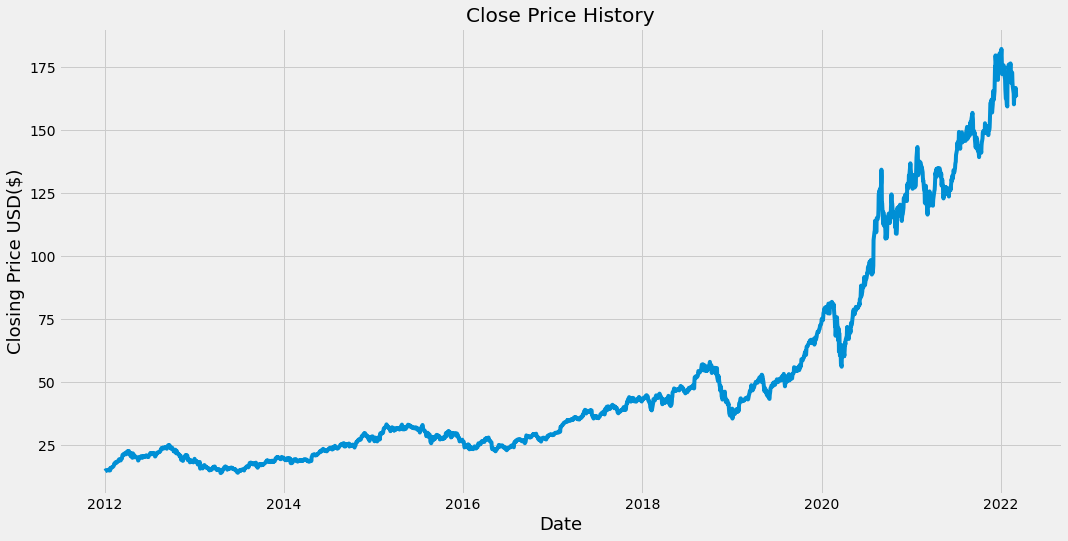

In [4]:
#Visualing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [5]:
#Create a new data
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2048

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.90806993],
       [0.90610636],
       [0.88789887]])

In [7]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [8]:
#Convert the X_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1988, 60, 1)

In [10]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))

#adding a fourth fifth layer and some Dropout regularistion
model.add(LSTM(units = 50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
'''for i in range(10):
    model.fit(x_train, y_train, batch_size=32, epochs=i)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)
    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    print(valid)'''
    
    
    

    

"for i in range(10):\n    model.fit(x_train, y_train, batch_size=32, epochs=i)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)\n    #plot the date\n    train = data[:training_data_len]\n    valid = data[training_data_len:]\n    valid['Predictions'] = predictions\n    #

In [13]:
'''rmse=10
while(rmse>0.1):
    #train the model
    model.fit(x_train, y_train, batch_size=32, epochs=1)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)'''
    
    


'rmse=10\nwhile(rmse>0.1):\n    #train the model\n    model.fit(x_train, y_train, batch_size=32, epochs=1)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)'

In [14]:
#train the model
model.fit(x_train, y_train, batch_size=32, epochs=120)

Epoch 1/120
63/63 [==============================] - 5s 38ms/step - loss: 8.2377e-04
Epoch 2/120
63/63 [==============================] - 2s 38ms/step - loss: 6.8992e-05
Epoch 3/120
63/63 [==============================] - 2s 38ms/step - loss: 6.7019e-05
Epoch 4/120
63/63 [==============================] - 2s 38ms/step - loss: 6.4196e-05
Epoch 5/120
63/63 [==============================] - 2s 37ms/step - loss: 6.0038e-05
Epoch 6/120
63/63 [==============================] - 2s 38ms/step - loss: 5.5280e-05
Epoch 7/120
63/63 [==============================] - 4s 69ms/step - loss: 5.6031e-05
Epoch 8/120
63/63 [==============================] - 5s 80ms/step - loss: 6.7185e-05
Epoch 9/120
63/63 [==============================] - 4s 56ms/step - loss: 4.4470e-05
Epoch 10/120
63/63 [==============================] - 2s 38ms/step - loss: 4.2513e-05
Epoch 11/120
63/63 [==============================] - 2s 37ms/step - loss: 4.6120e-05
Epoch 12/120
63/63 [==============================] - 4s 58ms/s

63/63 [==============================] - 2s 38ms/step - loss: 1.5599e-05
Epoch 97/120
63/63 [==============================] - 3s 54ms/step - loss: 1.5108e-05
Epoch 98/120
63/63 [==============================] - 5s 80ms/step - loss: 1.4090e-05
Epoch 99/120
63/63 [==============================] - 5s 77ms/step - loss: 1.4023e-05
Epoch 100/120
63/63 [==============================] - 5s 77ms/step - loss: 1.7547e-05
Epoch 101/120
63/63 [==============================] - 5s 79ms/step - loss: 1.7502e-05
Epoch 102/120
63/63 [==============================] - 5s 82ms/step - loss: 1.5453e-05
Epoch 103/120
63/63 [==============================] - 4s 57ms/step - loss: 1.4561e-05
Epoch 104/120
63/63 [==============================] - 2s 37ms/step - loss: 1.5287e-05
Epoch 105/120
63/63 [==============================] - 2s 37ms/step - loss: 1.3111e-05
Epoch 106/120
63/63 [==============================] - 4s 72ms/step - loss: 1.3272e-05
Epoch 107/120
63/63 [==============================] - 5s 77

In [15]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test adn y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

    
    


In [16]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [17]:
#resahpe the data
print(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test)

[[0.31015249 0.31543325 0.31455561 ... 0.39346969 0.38268501 0.36056527]
 [0.31543325 0.31455561 0.30995911 ... 0.38268501 0.36056527 0.34554108]
 [0.31455561 0.30995911 0.3029528  ... 0.36056527 0.34554108 0.35233916]
 ...
 [0.87998513 0.90069178 0.93555967 ... 0.89789519 0.89950167 0.88807736]
 [0.90069178 0.93555967 0.95876538 ... 0.89950167 0.88807736 0.90806993]
 [0.93555967 0.95876538 0.95567127 ... 0.88807736 0.90806993 0.90610636]]
[[[0.31015249]
  [0.31543325]
  [0.31455561]
  ...
  [0.39346969]
  [0.38268501]
  [0.36056527]]

 [[0.31543325]
  [0.31455561]
  [0.30995911]
  ...
  [0.38268501]
  [0.36056527]
  [0.34554108]]

 [[0.31455561]
  [0.30995911]
  [0.3029528 ]
  ...
  [0.36056527]
  [0.34554108]
  [0.35233916]]

 ...

 [[0.87998513]
  [0.90069178]
  [0.93555967]
  ...
  [0.89789519]
  [0.89950167]
  [0.88807736]]

 [[0.90069178]
  [0.93555967]
  [0.95876538]
  ...
  [0.89950167]
  [0.88807736]
  [0.90806993]]

 [[0.93555967]
  [0.95876538]
  [0.95567127]
  ...
  [0.8880

In [18]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

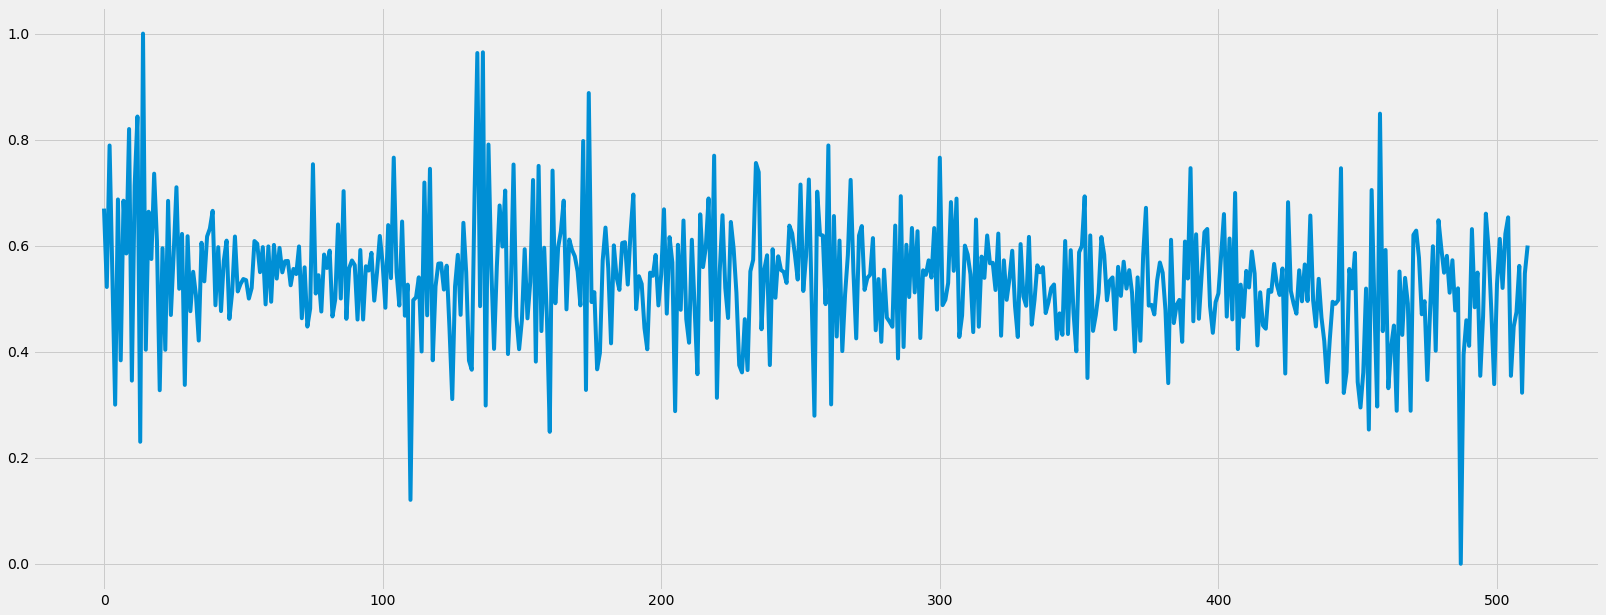

1.005109280347824


In [19]:
#get the root mean squared error (RMSE)
error = []
error.append(predictions - y_test)
nperr = np.array(predictions - y_test)
scaled_error = scaler.fit_transform(nperr)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error)
plt.show()
rmse =  np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)
#print(predictions)

(512, 3)


C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


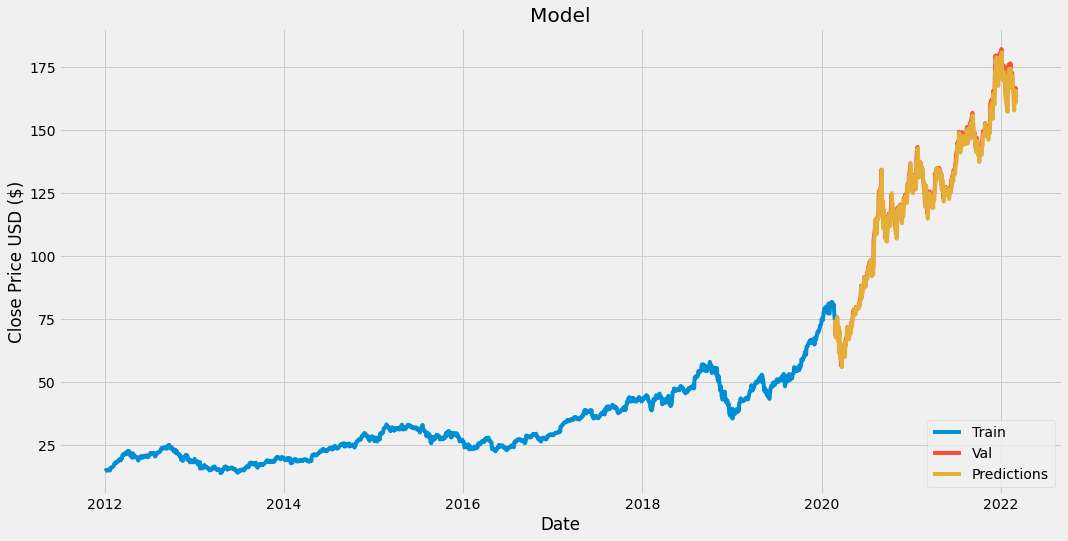

In [20]:
#plot the date

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Error'] = nperr

print(valid.shape)
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [21]:
#show the valid and predicted prices
valid

,Close,Predictions,Error
Date,,,
2020-02-25,72.019997,74.131912,2.111916
2020-02-26,73.162498,71.885551,-1.276947
2020-02-27,68.379997,73.219406,4.839409
2020-02-28,68.339996,67.633408,-0.706589
2020-03-02,74.702499,68.339851,-6.362648
...,...,...,...
2022-02-28,165.119995,162.763535,-2.356461
2022-03-01,163.199997,162.835297,-0.364700
2022-03-02,166.559998,160.712173,-5.847824


In [29]:
#get the Quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2020-07-01')
#create new data frame
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create the empty list
x_test = []
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
new_df.tail()

[[67.62949]]


,Close
Date,
2020-06-25,91.209999
2020-06-26,88.407501
2020-06-29,90.445000
2020-06-30,91.199997
2020-07-01,91.027496


In [23]:
pred_price + rmse*2.493

array([[100.63396]], dtype=float32)

In [31]:
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start='2020-07-01', end='2020-07-01')
print(apple_quote2['Close'])

Date
2020-06-30    91.199997
2020-07-01    91.027496
Name: Close, dtype: float64


In [25]:
import joblib

joblib.dump(model,'machine learning model/AAPL_model.pkl')
    


INFO:tensorflow:Assets written to: ram://605d5b9a-df4f-4e87-9a66-35a73ad08c63/assets


INFO:tensorflow:Assets written to: ram://605d5b9a-df4f-4e87-9a66-35a73ad08c63/assets


['machine learning model/AAPL_model.pkl']

In [26]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)